<a href="https://colab.research.google.com/github/ShubhamZoro/Deep_Learning/blob/main/NLP/SkimLit%20/SkimLit_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:The purpose of SkimLit is to make reading medical paper easier. An NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc..) to enable researchers to skim through the literature and dive deeper when necessary.

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


Trying to replicate this paper https://arxiv.org/pdf/1710.06071.pdf , https://arxiv.org/pdf/1612.05251.pdf

we can get datasets from here https://github.com/Franck-Dernoncourt/pubmed-rct

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 6.79 MiB/s, done.


In [ ]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames=[data_dir + filename for filename in os.listdir(data_dir)]
filenames

FileNotFoundError: ignored

In [ ]:
def get_lines(filename):
  with open(filename,'r') as f:
    return f.readlines()


In [ ]:
train_lines=get_lines(data_dir+"train.txt")

In [ ]:
train_lines[:27]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
# list1=[]

# for i in train_lines:
#   if i[0]=='#' or i[0]=='\n':
#     pass
#   else:
#     l=i.split("\t")
#     print(l[1].replace('\n',''))
#     dict1={'target':l[0],
#            'text':l[1],
#            }
#     list1.append(dict1)
# print(list1[:2])

def preprocess_text_with_line_numbers(filename):
  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_samples=[]
  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split("\t")
        line_data["target"]=target_text_split[0]
        line_data["text"]=target_text_split[1].lower()
        line_data["line_number"]=abstract_line_number
        line_data["total_lines"]=len(abstract_line_split)-1
        abstract_samples.append(line_data)
    else:
      abstract_lines+=line
  return abstract_samples







In [ ]:
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")

NameError: ignored

In [ ]:
train_samples[:5]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df.head(12)

NameError: ignored

In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [ ]:
train_sentences=train_df['text'].tolist()
val_sentences=val_df['text'].tolist()
test_sentences=test_df['text'].tolist()

NameError: ignored

In [ ]:
train_df.target.value_counts().values

array([59353, 57953, 27168, 21727, 13839])

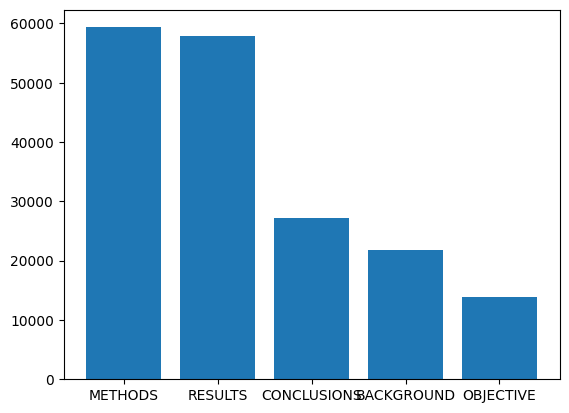

In [ ]:
import matplotlib.pyplot as plt
plt.bar(train_df.target.value_counts().index,train_df.target.value_counts().values)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded=label_encoder.fit_transform(val_df['target'].to_numpy())
test_labels_encoded=label_encoder.fit_transform(test_df['target'].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
model_0=Pipeline([("tf-idf",TfidfVectorizer()),
                  ("clf",MultinomialNB())])
model_0.fit(X=train_sentences,y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,y=val_labels_encoded)

0.7218323844829869

In [ ]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results=calculate_results(val_labels_encoded,baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [ ]:
sent_lens=[len(sentence.split()) for sentence in train_sentences]
avg_sent_len=np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

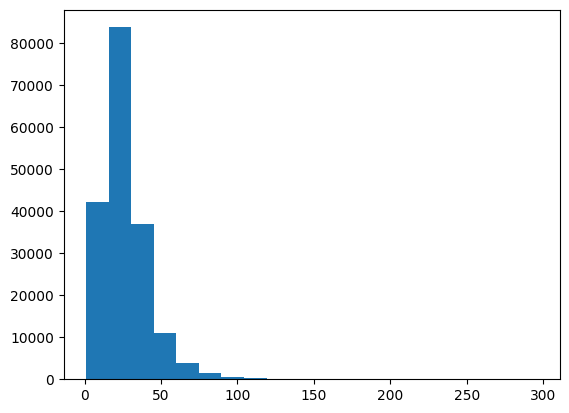

In [ ]:
plt.hist(sent_lens,bins=20)

In [ ]:
# calculating how long of a sentence cover 95% of example.
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

62

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(
    max_tokens=68000,
    output_sequence_length=output_seq_len
)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence=random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
a total of @ nursing students participated in two case analyses using human patient and computer-based simulations .

Length of text: 18

Vectorized text: [[   8   76    4 1607  515  820    5   51  825  291   59  631  127    3
  5364 7155    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]


In [ ]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in the vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocab: {rct_20k_text_vocab[-5:]}")

Number of words in vocab: 64841
Most common words in the vocab: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocab: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


# token embedding

In [ ]:
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),output_dim=128,mask_zero=True,name='token_embedding')

In [ ]:
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 a total of @ nursing students participated in two case analyses using human patient and computer-based simulations .

Sentence after vectorization (before embedding):
[[   8   76    4 1607  515  820    5   51  825  291   59  631  127    3
  5364 7155    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]

Sentence after embedding:
 [[[ 0.00219627 -0.02475177  0.01683087 ... -0.04794396  0.01271794
   -0.00316738]
  [-0.00108274 -0.0401585  -0.04788303 ...  0.01522375  0.0166063
    0.00208869]
  [ 0.03910357  0.01340694  0.00595062 ...  0.04835346 -0.02248956
   -0.0409497 ]
  ...
  [ 0.02282629  0.03352162 -0.03035499 ... -0.02746016  0.0437034
   -0.00699613]
  [ 0.02282629  0.03352162 -0.03035499 ... -0.02746016  0.0437034
   -0.00699613]
  [ 0.02282629  0.03352162 -0.030

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset=valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Conv1D with token embedding

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 62)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 62, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 62, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
history_model_1=model_1.fit(train_dataset,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            epochs=3,
                            validation_data=valid_dataset,
                            validation_steps=int(0.1*len(valid_dataset))
                            )

Epoch 1/3
562/562 [==============================] - 92s 161ms/step - loss: 0.9254 - accuracy: 0.6328 - val_loss: 0.6898 - val_accuracy: 0.7390
Epoch 2/3
562/562 [==============================] - 71s 126ms/step - loss: 0.6560 - accuracy: 0.7576 - val_loss: 0.6297 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 75s 133ms/step - loss: 0.6160 - accuracy: 0.7753 - val_loss: 0.5954 - val_accuracy: 0.7852


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 7s 8ms/step - loss: 0.5957 - accuracy: 0.7865


[0.5957227945327759, 0.7864755988121033]

In [ ]:
model_1_pred_probs=model_1.predict(valid_dataset)
model_1_pred_probs,model_1_pred_probs.shape

945/945 [==============================] - 6s 6ms/step


(array([[4.5531231e-01, 1.7954117e-01, 4.3890763e-02, 2.9427093e-01,
         2.6984833e-02],
        [4.1359812e-01, 3.2997879e-01, 1.3722089e-02, 2.3221642e-01,
         1.0484509e-02],
        [1.6675124e-01, 5.0523710e-03, 2.2930449e-03, 8.2582337e-01,
         7.9900368e-05],
        ...,
        [4.2161587e-06, 4.8328633e-04, 5.1240454e-04, 3.0780780e-06,
         9.9899703e-01],
        [4.3399807e-02, 5.0812346e-01, 6.8170488e-02, 4.8809338e-02,
         3.3149692e-01],
        [2.0029567e-01, 6.5701449e-01, 6.3656986e-02, 4.8522353e-02,
         3.0510493e-02]], dtype=float32),
 (30212, 5))

In [ ]:
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 78.64755726201508,
 'precision': 0.783420368482146,
 'recall': 0.7864755726201509,
 'f1': 0.7842243295341473}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

# ***Transfering Learning*** from tensorflow hub

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False,name="universal_sentence_encoder")

In [ ]:
random_train_sentence=random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence=tf_hub_embedding_layer([random_train_sentence])
print(f"sentence after embedding:\n{use_embedded_sentence[:20]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
 the polyphenols with the strongest inverse associations were flavanols ( hr = @ ; ci @-@ @ ; p-trend = @ ) , lignans ( hr = @ ; ci @-@ @ ; p-trend = @ ) , and hydroxybenzoic acids ( hr = @ ; ci @-@ @ ; p-trend @ ) .
sentence after embedding:
[[-3.59448642e-02 -6.07202947e-02 -6.79306015e-02  3.55934314e-02
   1.41915232e-02 -2.20743418e-02 -1.20610334e-02 -3.83109711e-02
  -6.19721459e-03  6.29316196e-02  3.97803709e-02  5.97667247e-02
  -6.74744770e-02  6.81141242e-02  3.88530418e-02 -5.29737361e-02
  -1.71280708e-02 -4.75848429e-02 -1.99320391e-04  4.72703166e-02
  -1.25946580e-02 -2.49570664e-02 -3.47297117e-02  6.05160818e-02
  -5.36886649e-03  7.16575235e-02 -6.01101406e-02  5.81208896e-03
  -4.19870503e-02 -4.22213040e-02 -2.21627802e-02  2.75617037e-02
  -3.73608172e-02 -4.46468256e-02 -1.72104631e-02 -3.17130610e-02
   3.50787789e-02 -2.93969028e-02  1.32618351e-02  5.45439422e-02
   4.16380912e-02  5.94172366e-02 -2.01258715e-02  6.20005168e-02
  -1.47972759e

# Feature Extraction using pretrained embedding using tensorflow hub


In [ ]:
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation='relu')(pretrained_embedding)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_2=tf.keras.Model(inputs=inputs,outputs=outputs,name="model_2_USE_feature_extractor")
model_2.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam()
,metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_model_2=model_2.fit(train_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_dataset)),
                            validation_data=valid_dataset,
                            validation_steps=int(0.1*len(valid_dataset))
                            )

Epoch 1/3
562/562 [==============================] - 11s 15ms/step - loss: 0.9155 - accuracy: 0.6500 - val_loss: 0.7950 - val_accuracy: 0.6855
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7674 - accuracy: 0.7027 - val_loss: 0.7524 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7505 - accuracy: 0.7136 - val_loss: 0.7357 - val_accuracy: 0.7158


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7393 - accuracy: 0.7147


[0.7392531633377075, 0.7147160172462463]

In [ ]:
model_2_pred_probs=model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 17s 17ms/step


array([[0.40819344, 0.36207923, 0.00281262, 0.21884334, 0.00807142],
       [0.37399715, 0.45842946, 0.00458589, 0.15964118, 0.0033463 ],
       [0.22279073, 0.14218979, 0.01949939, 0.57669306, 0.03882704],
       ...,
       [0.00163722, 0.00625561, 0.05140864, 0.00101058, 0.939688  ],
       [0.00442847, 0.04864397, 0.21010847, 0.00145442, 0.7353646 ],
       [0.161456  , 0.2892761 , 0.4875281 , 0.00447119, 0.05726863]],
      dtype=float32)

In [ ]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 71.47160068846816,
 'precision': 0.7156190157954917,
 'recall': 0.7147160068846816,
 'f1': 0.7119458344023019}

# Conv1D with character embeddings

In [ ]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_train_sentence)

't h e   p o l y p h e n o l s   w i t h   t h e   s t r o n g e s t   i n v e r s e   a s s o c i a t i o n s   w e r e   f l a v a n o l s   (   h r   =   @   ;   c i   @ - @   @   ;   p - t r e n d   =   @   )   ,   l i g n a n s   (   h r   =   @   ;   c i   @ - @   @   ;   p - t r e n d   =   @   )   ,   a n d   h y d r o x y b e n z o i c   a c i d s   (   h r   =   @   ;   c i   @ - @   @   ;   p - t r e n d   @   )   .'

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_len=np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

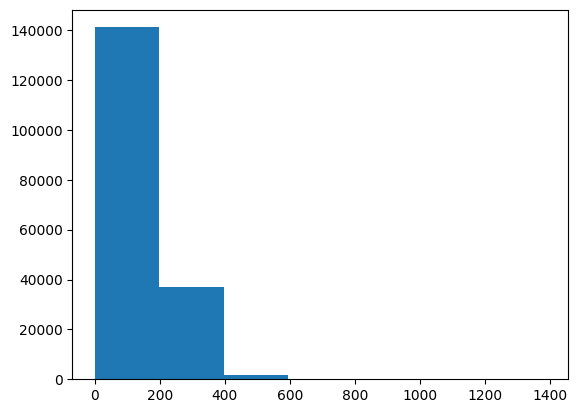

In [ ]:
plt.hist(char_lens,bins=7)

In [ ]:
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
#get all the keyboard character so we use their len as max_token
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  name='char_vecotrizer',
                                  )

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab=char_vectorizer.get_vocabulary()
print(f'Number of different characters in character vocab:{len(char_vocab)}')
print(f'5 most common characters: {char_vocab[:5]}')
print(f'5 least common characters: {char_vocab[-5:]}')

Number of different characters in character vocab:28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars=random.choice(train_chars)
print(random_train_chars)
vectorized_chars=char_vectorizer([random_train_chars])
print(f"\vectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

t r a d i t i o n a l   c h i n e s e   m e d i c i n e   (   t c m   )   p o s s e s s e s   s e v e r a l   a d v a n t a g e s   f o r   t r e a t i n g   p a t i e n t s   w i t h   h e p a t o c e l l u l a r   c a r c i n o m a   (   h c c   )   .
ectorized chars:
[[ 3  8  5 10  4  3  4  7  6  5 12 11 13  4  6  2  9  2 15  2 10  4 11  4
   6  2  3 11 15 14  7  9  9  2  9  9  2  9  9  2 21  2  8  5 12  5 10 21
   5  6  3  5 18  2  9 17  7  8  3  8  2  5  3  4  6 18 14  5  3  4  2  6
   3  9 20  4  3 13 13  2 14  5  3  7 11  2 12 12 16 12  5  8 11  5  8 11
   4  6  7 15  5 13 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

# Creating a character-level embedding

In [ ]:
char_embed=layers.Embedding(input_dim=len(char_vocab),output_dim=25,
                            mask_zero=True,
                            name='char_embedding')


In [ ]:
print(f"char before vectorization:\n {random_train_chars}\n")
vectorized_char=char_vectorizer([random_train_chars])
print(f"Sentence after vectorization (before embedding):\n{vectorized_char}\n")
char_embed_example=char_embed(vectorized_char)
print(f" after embedding:\n {char_embed_example}\n")
print(f"Embedded sentence shape: {char_embed_example.shape}")

char before vectorization:
 t r a d i t i o n a l   c h i n e s e   m e d i c i n e   (   t c m   )   p o s s e s s e s   s e v e r a l   a d v a n t a g e s   f o r   t r e a t i n g   p a t i e n t s   w i t h   h e p a t o c e l l u l a r   c a r c i n o m a   (   h c c   )   .

Sentence after vectorization (before embedding):
[[ 3  8  5 10  4  3  4  7  6  5 12 11 13  4  6  2  9  2 15  2 10  4 11  4
   6  2  3 11 15 14  7  9  9  2  9  9  2  9  9  2 21  2  8  5 12  5 10 21
   5  6  3  5 18  2  9 17  7  8  3  8  2  5  3  4  6 18 14  5  3  4  2  6
   3  9 20  4  3 13 13  2 14  5  3  7 11  2 12 12 16 12  5  8 11  5  8 11
   4  6  7 15  5 13 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(inputs)
char_embeddings=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation="softmax")(x)
model_3=tf.keras.Model(inputs,
                       outputs,
                       name='model_3_conv1d_char_embedding'
                       )
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vecotrizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embedding (Embedding)  (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
train_char_dataset=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_3_history=model_3.fit(train_char_dataset,
                            steps_per_epoch=int(0.1*len(train_char_dataset)),
                            epochs=3,
                            validation_data=val_char_dataset,
                            validation_steps=int(0.1*len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 16s 26ms/step - loss: 1.2675 - accuracy: 0.4963 - val_loss: 1.0333 - val_accuracy: 0.6041
Epoch 2/3
562/562 [==============================] - 15s 27ms/step - loss: 0.9948 - accuracy: 0.6102 - val_loss: 0.9264 - val_accuracy: 0.6390
Epoch 3/3
562/562 [==============================] - 17s 30ms/step - loss: 0.9162 - accuracy: 0.6452 - val_loss: 0.8502 - val_accuracy: 0.6752


In [ ]:
model_3_pred_probs=model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 7s 7ms/step


array([[0.2688278 , 0.23965225, 0.17061153, 0.24372202, 0.07718647],
       [0.15027419, 0.59187293, 0.01850948, 0.1260077 , 0.11333575],
       [0.11411911, 0.32437012, 0.1548906 , 0.1745648 , 0.23205538],
       ...,
       [0.01871559, 0.03237997, 0.06705438, 0.02368496, 0.858165  ],
       [0.01690457, 0.16413866, 0.08625298, 0.03307612, 0.69962764],
       [0.34316182, 0.4811902 , 0.07980812, 0.08325289, 0.01258696]],
      dtype=float32)

In [ ]:
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 1, ..., 4, 4, 1])>

In [ ]:
model_3_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

{'accuracy': 66.23858069641201,
 'precision': 0.6549489740307897,
 'recall': 0.6623858069641202,
 'f1': 0.6542662174044772}

# Combining pretrained token embedding with character embedding

In [ ]:
# token_inputs=layers.Input(shape=[],dtype=tf.string,name="token_input")
# token_embeddings=tf_hub_embedding_layer(token_inputs)
# token_output=layers.Dense(128,activation='relu')(token_embeddings)
# token_model=tf.keras.Model(inputs=token_inputs,
#                            outputs=token_output)

token_inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
token_outputs=layers.Dense(32,activation="relu")(x)
token_model=tf.keras.Model(inputs,outputs)


char_inputs=layers.Input(shape=(1,) ,dtype=tf.string,name='char_input')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

token_char_concat=layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                char_model.output])
#dropout layers is use to prevent overfitting.
combined_dropout=layers.Dropout(0.5)(token_char_concat)
combined_dense=layers.Dense(128,activation='relu')(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation='softmax')(final_dropout)

model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,
                       name="model_4_token_and_char_embeddings"
                       )

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 char_vecotrizer (TextVectoriza  (None, 290)         0           ['input_3[0][0]',                
 tion)                                                            'char_input[0][0]']             
                                                                                                  
 char_embedding (Embedding)     (None, 290, 25)      700         ['char_vecotrizer[0][0]',        
                                                                  'char_vecotrizer[1][0]']        
                                                                  

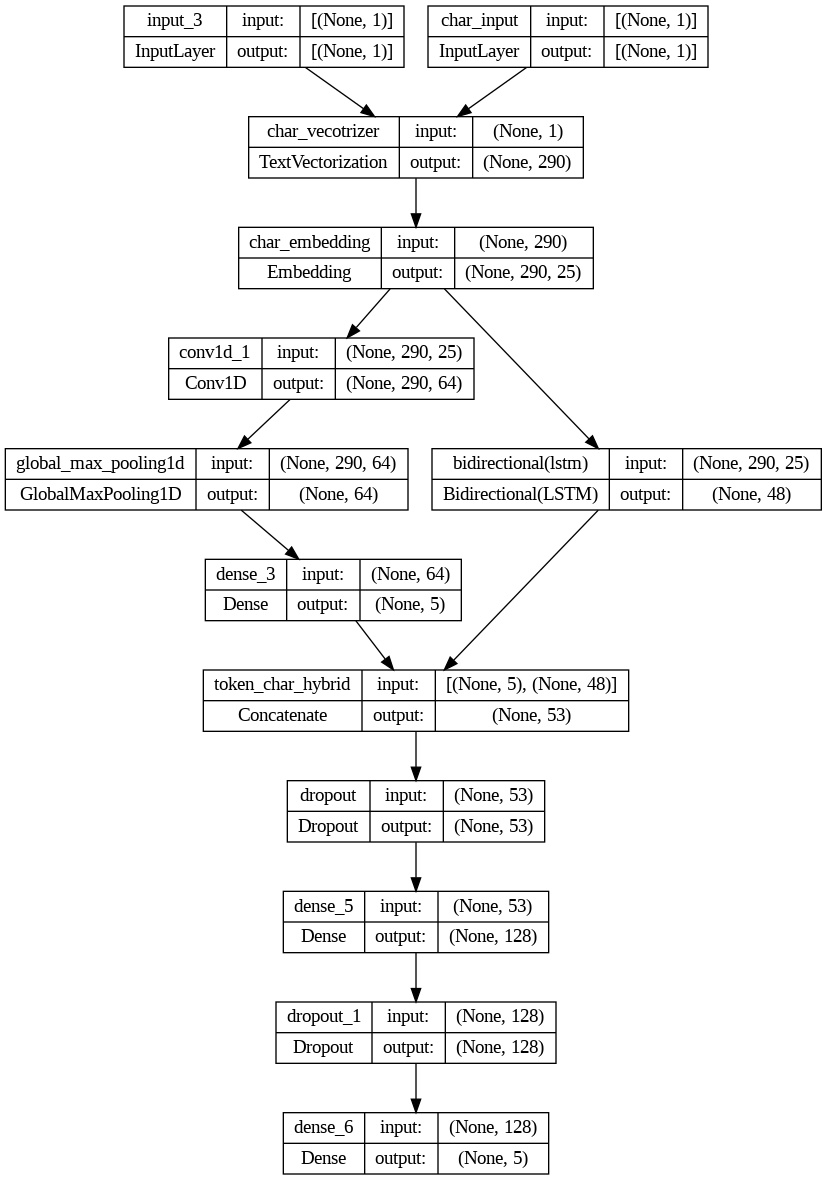

In [ ]:
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# train_token_char_dataset=tf.data.Dataset.from_tensor_slices(((train_sentences,train_chars),train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
# val_token_char_dataset=tf.data.Dataset.from_tensor_slices(((val_sentences,val_chars),val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
# test_token_char_dataset=tf.data.Dataset.from_tensor_slices(((test_sentences,test_chars),test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))
train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))
val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data=tf.data.Dataset.from_tensor_slices((test_sentences,test_chars))
test_char_token_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_dataset=tf.data.Dataset.zip((test_char_token_data,test_char_token_labels))
test_char_token_dataset=test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# train_token_char_dataset

In [ ]:
train_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# model_4_history=model_4.fit(train_token_char_dataset,
#                             steps_per_epoch=int(0.1*len(train_token_char_dataset)),
#                             epochs=3,
#                             validation_data=val_token_char_dataset,
#                             validation_steps=int(0.1*len(val_token_char_dataset)))

In [ ]:
model_4_history=model_4.fit(train_char_token_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            epochs=3,
                            validation_data=val_char_token_dataset,
                            validation_steps=int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 227s 386ms/step - loss: 1.3435 - accuracy: 0.4366 - val_loss: 1.2021 - val_accuracy: 0.5020
Epoch 2/3
562/562 [==============================] - 211s 376ms/step - loss: 1.2294 - accuracy: 0.4811 - val_loss: 1.1526 - val_accuracy: 0.5326
Epoch 3/3
562/562 [==============================] - 208s 371ms/step - loss: 1.1878 - accuracy: 0.5053 - val_loss: 1.1148 - val_accuracy: 0.5462


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 65s 69ms/step - loss: 1.1147 - accuracy: 0.5411


[1.1146774291992188, 0.5411095023155212]

In [ ]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)

945/945 [==============================] - 68s 69ms/step


In [ ]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 1, 3, ..., 4, 2, 1])>

In [ ]:
model_4_results=calculate_results(y_true=val_labels_encoded,y_pred=model_4_preds)
model_4_results

{'accuracy': 54.110949291672185,
 'precision': 0.5786254288879596,
 'recall': 0.5411094929167218,
 'f1': 0.5298409109583793}

In [ ]:
model_1_results

{'accuracy': 78.64755726201508,
 'precision': 0.783420368482146,
 'recall': 0.7864755726201509,
 'f1': 0.7842243295341473}

# token_embedding+character_embedding+positional_embedding

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [ ]:
train_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
train_line_numbers_one_hot[:10],train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([180040, 15]))

In [ ]:
train_df['total_lines'].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: ylabel='Frequency'>

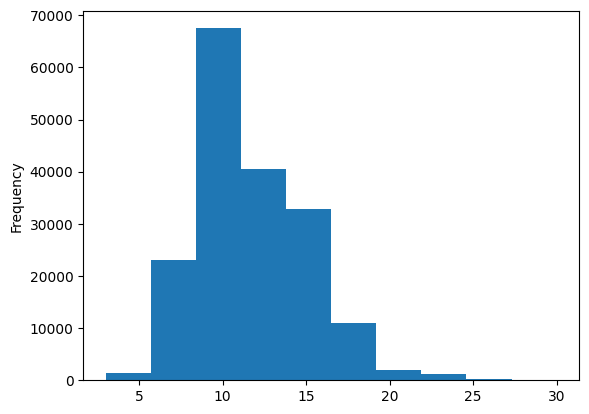

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
np.percentile(train_df.total_lines,98)

20.0

In [ ]:
train_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_total_lines_one_hot=tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_lines_one_hot=tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)
train_total_lines_one_hot.shape,train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

# Tibrid Model
create token model and character model and concatenate them then create model with line_number and total_line feature and concatenate all the model.

In [ ]:
#token model
token_inputs=layers.Input(shape=[],dtype="string",name="token_input")
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,outputs=token_outputs)
# token_inputs=layers.Input(shape=(1,),dtype=tf.string)
# text_vectors=text_vectorizer(inputs)
# token_embeddings=token_embed(text_vectors)
# x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
# x=layers.GlobalAveragePooling1D()(x)
# token_outputs=layers.Dense(32,activation="relu")(x)
# token_model=tf.keras.Model(inputs,outputs)

#character model
# here the shape is(1,) because When using `TextVectorization`
#to tokenize strings,
#the input rank must be 1 or the last shape dimension must be 1
char_inputs=layers.Input(shape=(1,),dtype="string",name='char_inputs')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model=tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm)
#line_number model
#for input shape check the shape of 1st element of one_hot_encoded data
line_number_inputs=layers.Input(shape=(15,),dtype=tf.float32,name="line_number_input")
x=layers.Dense(32,activation='relu')(line_number_inputs)
line_number_model=tf.keras.Model(inputs=line_number_inputs,outputs=x)

#total lines model
total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32,name="total_lines_input")
y=layers.Dense(32,activation='relu')(total_lines_inputs)
total_line_model=tf.keras.Model(inputs=total_lines_inputs,outputs=y)

# combine token and char model
combined_embeddings=layers.Concatenate(name='char_token_hybrid_embedding')([token_model.output,
                                                                           char_model.output])
z=layers.Dense(256,activation='relu')(combined_embeddings)
z=layers.Dropout(0.5)(z)
# positional embedding with combine embedding
tribrid_embeddings=layers.Concatenate(name="char_token_positional_embedding")([line_number_model.output,
                                                                               total_line_model.output,
                                                                               z
                                                                               ])
output_layer=layers.Dense(num_classes,activation="softmax",name='output_layer')(tribrid_embeddings)
model_5=tf.keras.Model(inputs=[line_number_model.input,
                               total_line_model.input,
                               token_model.input,
                               char_model.input],
                       outputs=output_layer,
                       name='model_5_tribrid_embedding_model')

In [ ]:
model_5.summary()

Model: "model_5_tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_inputs (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vecotrizer (TextVectoriza  (None, 290)         0           ['char_inputs[0][0]']            
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['t

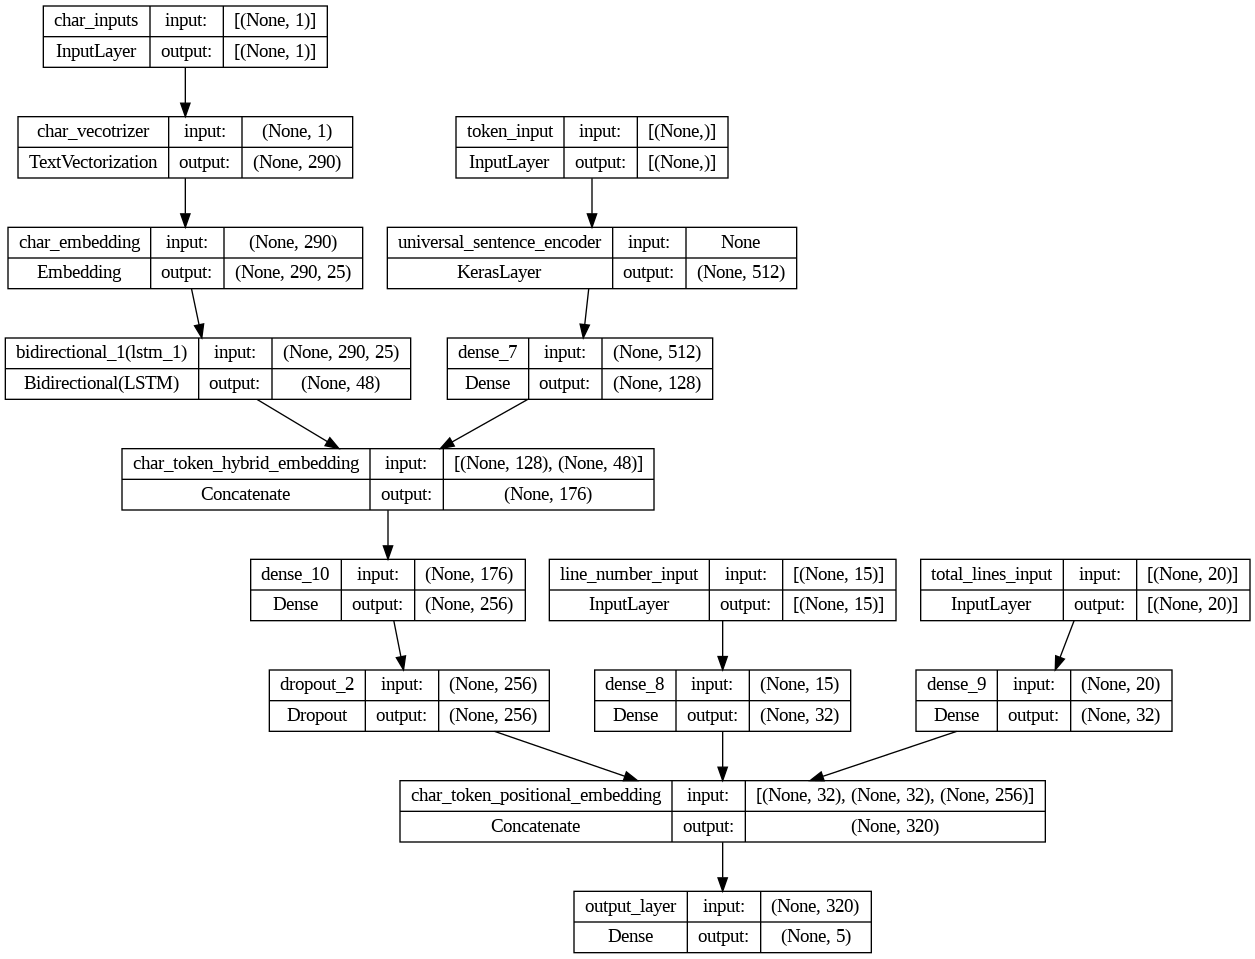

In [ ]:
plot_model(model_5,show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),#helps to prevent overfitting
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# tribrid tf.data

In [ ]:
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentences,
                                                              train_chars))
train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


test_char_token_pos_data=tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                              test_total_lines_one_hot,
                                                              test_sentences,
                                                              test_chars))
test_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset=tf.data.Dataset.zip((test_char_token_pos_data,test_char_token_pos_labels))
test_char_token_pos_dataset=test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_5_history=model_5.fit(train_char_token_pos_dataset,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            epochs=3,
                            validation_data=val_char_token_pos_dataset,
                            validation_steps=int(0.1*len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 212s 358ms/step - loss: 1.0942 - accuracy: 0.7295 - val_loss: 0.9816 - val_accuracy: 0.8068
Epoch 2/3
562/562 [==============================] - 197s 351ms/step - loss: 0.9678 - accuracy: 0.8144 - val_loss: 0.9490 - val_accuracy: 0.8271
Epoch 3/3
562/562 [==============================] - 195s 348ms/step - loss: 0.9520 - accuracy: 0.8213 - val_loss: 0.9391 - val_accuracy: 0.8314


In [ ]:
model_5.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 67s 71ms/step - loss: 0.9372 - accuracy: 0.8336


[0.9371961951255798, 0.8335760831832886]

In [ ]:
model_5_pred_probs=model_5.predict(val_char_token_pos_dataset)

945/945 [==============================] - 69s 69ms/step


In [ ]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results=calculate_results(y_true=val_labels_encoded,y_pred=model_5_preds)
model_5_results

{'accuracy': 83.3576062491725,
 'precision': 0.8328190655124185,
 'recall': 0.8335760624917251,
 'f1': 0.8324616279189482}

In [ ]:
all_model_results=pd.DataFrame({"model_0_baseline":baseline_results,
                                "model_1_custom_token_embedding":model_1_results,
                                "model_2_pretrained_token_embedding":model_2_results,
                                "model_3_hybrid_char_token_embedding":model_3_results,
                                "model_4_hybrid_char_token_embedding":model_4_results,
                                "model_5_pos_char_token_embedding":model_5_results})
all_model_results

,model_0_baseline,model_1_custom_token_embedding,model_2_pretrained_token_embedding,model_3_hybrid_char_token_embedding,model_4_hybrid_char_token_embedding,model_5_pos_char_token_embedding
accuracy,72.183238,78.647557,71.471601,66.238581,54.110949,83.357606
precision,0.718647,0.783420,0.715619,0.654949,0.578625,0.832819
recall,0.721832,0.786476,0.714716,0.662386,0.541109,0.833576
f1,0.698925,0.784224,0.711946,0.654266,0.529841,0.832462


In [ ]:
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.647557,0.783420,0.786476,0.784224
model_2_pretrained_token_embedding,71.471601,0.715619,0.714716,0.711946
model_3_hybrid_char_token_embedding,66.238581,0.654949,0.662386,0.654266
model_4_hybrid_char_token_embedding,54.110949,0.578625,0.541109,0.529841
model_5_pos_char_token_embedding,83.357606,0.832819,0.833576,0.832462


In [ ]:
all_model_results['accuracy']=all_model_results['accuracy']/100

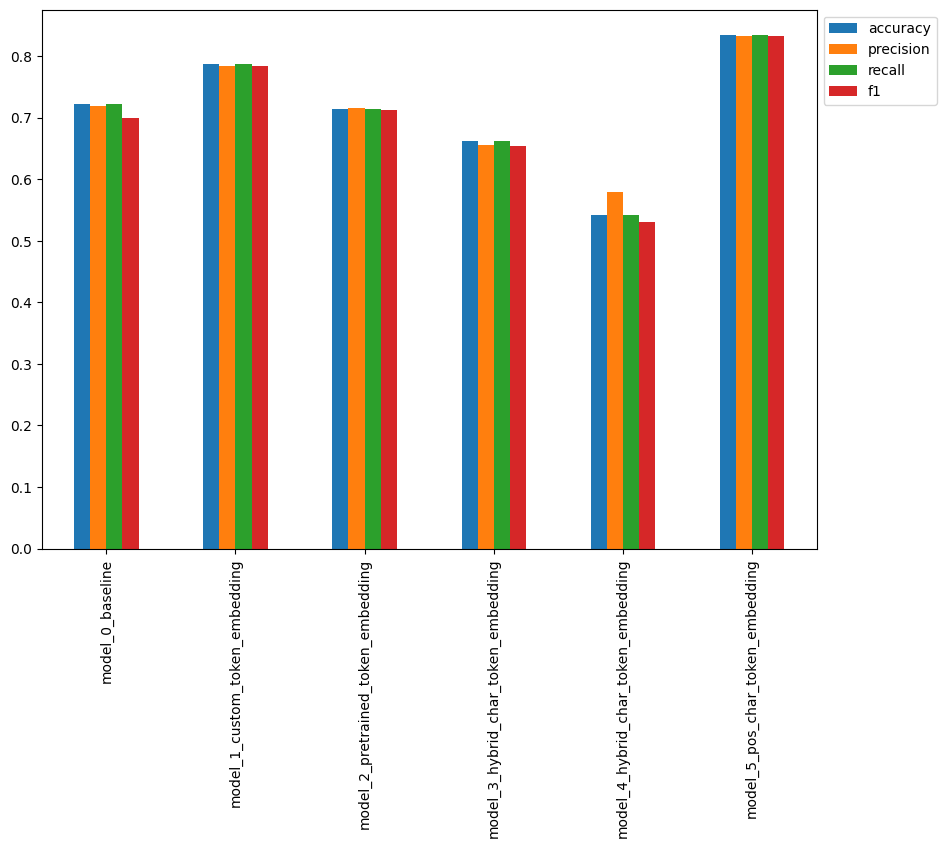

In [ ]:
all_model_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

# Model 6

In [ ]:
# #token model

# token_inputs=layers.Input(shape=(1,),dtype=tf.string)
# text_vectors=text_vectorizer(inputs)
# token_embeddings=token_embed(text_vectors)
# x=layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(token_embeddings)
# x=layers.GlobalAveragePooling1D()(x)
# token_outputs=layers.Dense(32,activation="relu")(x)
# token_model=tf.keras.Model(inputs,outputs)


# #line_number model
# #for input shape check the shape of 1st element of one_hot_encoded data
# line_number_inputs=layers.Input(shape=(15,),dtype=tf.float32,name="line_number_input")
# x=layers.Dense(32,activation='relu')(line_number_inputs)
# line_number_model=tf.keras.Model(inputs=line_number_inputs,outputs=x)

# #total lines model
# total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32,name="total_lines_input")
# y=layers.Dense(32,activation='relu')(total_lines_inputs)
# total_line_model=tf.keras.Model(inputs=total_lines_inputs,outputs=y)


# # positional embedding with combine embedding
# token_line_total_embeddings=layers.Concatenate(name="token_line_numbers_total_lines_hybrid_embedding")([line_number_model.output,
#                                                                                total_line_model.output,
#                                                                                token_model.output
#                                                                                ])
# output_layer=layers.Dense(num_classes,activation="softmax",name='output_layer')(token_line_total_embeddings)
# model_6=tf.keras.Model(inputs=[line_number_model.input,
#                                total_line_model.input,
#                                token_model.input,
#                                ],
#                        outputs=output_layer,
#                        name='model_6_tribrid_embedding_model')

In [ ]:
# model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),#helps to prevent overfitting
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

In [ ]:
# train_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
#                                                               train_total_lines_one_hot,
#                                                               train_sentences,
#                                                               ))
# train_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
# train_token_pos_dataset=tf.data.Dataset.zip((train_token_pos_data,train_token_pos_labels))
# train_token_pos_dataset=train_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# val_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
#                                                               val_total_lines_one_hot,
#                                                               val_sentences,
#                                                               ))
# val_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
# val_token_pos_dataset=tf.data.Dataset.zip((val_token_pos_data,val_token_pos_labels))
# val_token_pos_dataset=val_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# test_token_pos_data=tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
#                                                               test_total_lines_one_hot,
#                                                               test_sentences,
#                                                               ))
# test_token_pos_labels=tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
# test_token_pos_dataset=tf.data.Dataset.zip((test_token_pos_data,test_token_pos_labels))
# test_token_pos_dataset=test_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# train_token_pos_dataset

In [ ]:
# model_6_history=model_6.fit(train_token_pos_dataset,
#                             steps_per_epoch=int(0.1*len(train_token_pos_dataset)),
#                             epochs=3,
#                             validation_data=val_token_pos_dataset,
#                             validation_steps=int(0.1*len(val_token_pos_dataset)))

In [ ]:
# model_6.evaluate(val_token_pos_dataset)

In [ ]:
# model_6_pred_probs=model_6.predict(val_token_pos_dataset)

In [ ]:
# model_6_preds=tf.argmax(model_6_pred_probs,axis=1)
# model_6_preds

In [ ]:
# model_6_results=calculate_results(y_true=val_labels_encoded,y_pred=model_6_preds)
# model_6_results

In [ ]:
# all_model_results=pd.DataFrame({"model_0_baseline":baseline_results,
#                                 "model_1_custom_token_embedding":model_1_results,
#                                 "model_2_pretrained_token_embedding":model_2_results,
#                                 "model_3_hybrid_char_token_embedding":model_3_results,
#                                 "model_4_hybrid_char_token_embedding":model_4_results,
#                                 "model_5_pos_char_token_embedding":model_5_results,
#                                 # "model_6_token_pos_embedding":model_6_results})
# all_model_results

In [ ]:
all_model_results=all_model_results.transpose()
all_model_results

,model_0_baseline,model_1_custom_token_embedding,model_2_pretrained_token_embedding,model_3_hybrid_char_token_embedding,model_4_hybrid_char_token_embedding,model_5_pos_char_token_embedding
accuracy,0.721832,0.786476,0.714716,0.662386,0.541109,0.833576
precision,0.718647,0.783420,0.715619,0.654949,0.578625,0.832819
recall,0.721832,0.786476,0.714716,0.662386,0.541109,0.833576
f1,0.698925,0.784224,0.711946,0.654266,0.529841,0.832462


In [ ]:
all_model_results=pd.DataFrame({"model_0_baseline":baseline_results,
                                "model_1_custom_token_embedding":model_1_results,
                                "model_2_pretrained_token_embedding":model_2_results,
                                "model_3_hybrid_char_token_embedding":model_3_results,
                                "model_4_hybrid_char_token_embedding":model_4_results,
                                "model_5_pos_char_token_embedding":model_5_results})
all_model_results

,model_0_baseline,model_1_custom_token_embedding,model_2_pretrained_token_embedding,model_3_hybrid_char_token_embedding,model_4_hybrid_char_token_embedding,model_5_pos_char_token_embedding
accuracy,72.183238,78.647557,71.471601,66.238581,54.110949,83.357606
precision,0.718647,0.783420,0.715619,0.654949,0.578625,0.832819
recall,0.721832,0.786476,0.714716,0.662386,0.541109,0.833576
f1,0.698925,0.784224,0.711946,0.654266,0.529841,0.832462


In [ ]:
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.647557,0.783420,0.786476,0.784224
model_2_pretrained_token_embedding,71.471601,0.715619,0.714716,0.711946
model_3_hybrid_char_token_embedding,66.238581,0.654949,0.662386,0.654266
model_4_hybrid_char_token_embedding,54.110949,0.578625,0.541109,0.529841
model_5_pos_char_token_embedding,83.357606,0.832819,0.833576,0.832462


<Axes: >

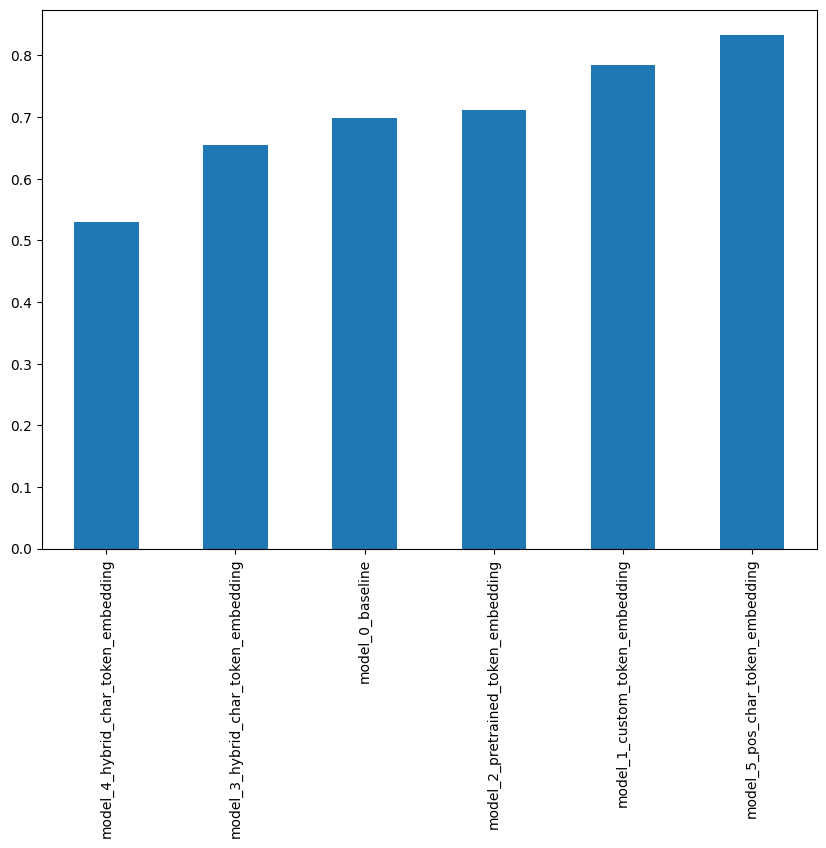

In [ ]:
all_model_results.sort_values("f1",ascending=True)["f1"].plot(kind='bar',figsize=(10,7))

# Save and load model

In [ ]:
model_5.save("skimlit_tribrid_model")

In [ ]:
loaded_model=tf.keras.models.load_model("skimlit_tribrid_model")

In [ ]:
list(train_char_token_pos_data.as_numpy_iterator())

[(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        dtype=float32),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.], dtype=float32),
  b'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  b't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e

In [ ]:
loaded_pred_probs=loaded_model.predict(val_char_token_pos_dataset)
loaded_preds=tf.argmax(loaded_pred_probs,axis=1)
loaded_preds[:10]

945/945 [==============================] - 67s 67ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
type(train_char_token_pos_data)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# cm = confusion_matrix(val_labels_encoded, model_5_preds)
# cm